In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import pandas as pd

from scipy.optimize import curve_fit as cf

## Python, Open Source, and Teaching

Matti Picus, Full-time NumPy Developer 


- thanks
- Hebrew/English?
- we will talk about: Open Source, Python, how can python be used as a first programming language. Along the way I will talk about myself and what I do now.

## Why is Open Source like Science?

In a perfect world
 - Pluralistic: anyone can contribute
 - Merit-based contributions
 - The result belongs to everyone


## Python and Open Source grew up together

- Started in the 90s
- Have grown up a lot since then
  - Open Source moved from exchange of CDs and GPL to github and BSD/MIT
  - Python matured, move from v1 to v2 to v3
- Both now power the latest AI research, and are at the forefront of the tech world

## Open Source and Licenses

Code is text, is covered by copyright (like any text).
Various kinds of licenses
- None (need explicit permission)
- Proprietary (Microsoft, Intel, NVidia)
- Standardized
  - Copy-left: GPL, LGPL, AGPL, Afero
  - Permissive BSD, MIT, Apache

just like a research paper, code is text and protected.

## But

Licenses and Managing Open Source is a whole other lecture


## Python

Python is a syntax, an interpreter, and a community of contributors


### A language syntax

- indentation-based blocks of code
- looks much like psuedo-code
- dynamically types
- supports functional programming, OOP
- interpreted, but its roots are C


In [2]:
def recur_fibo(n):
   """Recursive function to
   calculate Fibonacci sequence"""
   if n <= 1:
       return n
   else:
       return(recur_fibo(n-1) + recur_fibo(n-2))
       
def test():
    assert recur_fibo(10) == 55

### An interpreter + stdlib

- "batteries included"
- needs little OS support to actually run
- can be the glue to interact with other languages, binaries


### Community

  - Rich ecosystem
    - NumPy, DJango, SciPy, matplotlib
  - Easily extensible
    - Tensorflow, PyTorch, OpenCV
  - Commercially supported
    - Anaconda, Enthought, Microsoft, Intel, devops 


## Now I can explain what I am doing here

- Worked in image processing for many years in industry
- Got "hooked" into Open Source, both as contributor and as an evangelist
- Two-year grant from Sloan and Moore Foundation to work on NumPy


kibbutznik, doctorate, startup, real-time video.

latex editor, OpenCV, PyPy

Remember science + open source?

## How is Python used in teaching?
- Can be used stand-alone, each student installs Python on a machine and works through lessons
  - command line
  - IDE
- Can be taught as a "first language", since it is interpreted no compilation is needed.

### Various IDEs
- Non-IDE
  - VIM + console
- Traditional IDE
  - VS Code
  - PyCharm
  - Spyder

### How is Python used in teaching?
- Can be used via Jupyter Notebooks
- Notebooks in the local browser, kernels can be remote or local
  - Kernels: Julia, Python, R, (Matlab, C++ too)
  - Kernels run anywhere: JupyterHub runs them in the cloud
  - Students need only a minimal setup and a login


# THIS WHOLE SLIDESHOW IS A NOTEBOOK

In [4]:
print('ac')
print(2, recur_fibo(2))
print(3, recur_fibo(5))

ac
2 1
3 5


### Notebooks in teaching

- How and why to teach with Jupyter Notebooks https://jupyter4edu.github.io/jupyter-edu-book/catalogue.html

- Scientific Python Lectures https://github.com/jrjohansson/scientific-python-lectures

In [5]:
import numpy as np
a = np.ones((10,10))

In [6]:
print(a)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [7]:
# Set up a demo of curve fitting in Scipy
# adapted from https://github.com/tirthajyoti/Interactive_Machine_Learning/blob/master/Curve_fit_widget_1.ipynb
# which is under the MIT license

N_samples = 25
x=np.linspace(-2,2,N_samples)

### Function definitions (ideal fitting function and actual data generating function with noise)

In [8]:
def f(x,a,mu,sigma):
    r=a*np.exp(-(x-mu)**2/(2*sigma**2))
    return (r)

def func(amplitude,ideal_mu,ideal_sigma,noise_sd,noise_mean):
    r=amplitude*np.exp(-(x-ideal_mu)**2/(2*ideal_sigma**2))
    plt.figure(figsize=(8,5))
    plt.plot(x,r,c='k',lw=3)
    r= r+np.random.normal(loc=noise_mean,scale=noise_sd,size=N_samples)
    plt.scatter(x,r,edgecolors='k',c='yellow',s=60)
    plt.grid(True)
    plt.show()
    return (r)


### Call the 'interactive' widget with the data generating function, which also plots the data real-time

<div dir="rtl">
שחק עם  'noise_sd' ו- 'noise_mean' פרמטרים לראות איך הם משפיעים על דיוק ההתאמה (curve-fit)
</div>

In [9]:
y=interactive(func,amplitude=[1,2,3,4,5],ideal_mu=(-5,5,0.5),
              ideal_sigma=(0,2,0.2),
              noise_sd=(0,1,0.1),noise_mean=(-1,1,0.2))
display(y)

interactive(children=(Dropdown(description='amplitude', options=(1, 2, 3, 4, 5), value=1), FloatSlider(value=0…

           Original Params  Estimated Params
Amplitude              3.0          3.339776
Mean                  -0.5         -0.488293
Std.Dev                1.0          1.143206


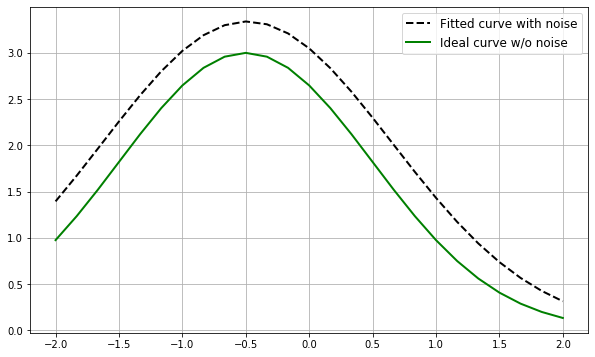

In [10]:
# Curve-fit optimizer
p = y.result
p1,_=cf(f,xdata=x,ydata=p)
par_lst=list(p1)

# Gather ideal parameters from the interactive widget object
p2=list(y.kwargs.values())
p3=p2[0:3]

# Make the data matrix
data = np.array([p3,par_lst])

# Put it in a Data Frame
df=pd.DataFrame(data=data.T,index=['Amplitude','Mean','Std.Dev'],columns=['Original Params','Estimated Params'])
print(df)

# Plot the ideal and estimated curves
plt.figure(figsize=(10,6))
plt.plot(x,f(x,par_lst[0],par_lst[1],par_lst[2]),'k--',lw=2)
plt.plot(x,f(x,p3[0],p3[1],p3[2]),c='green',lw=2)
plt.legend(['Fitted curve with noise','Ideal curve w/o noise'],fontsize=12)
plt.grid(True)
plt.show()

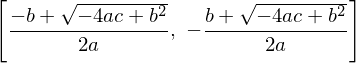

In [11]:
from sympy import *
from IPython.display import display
init_printing()
var('a:z')
eq = Eq(a*x**2+b*x+c,0)
display(eq)
solve(eq,x)

### Calculus Example

Here's a more advanced example that solves a second-order differential equation (an example of the so-called "harmonic oscillator" equation):

In [ ]:
from sympy import *
var('C1 C2');
y = Function('y')
de = diff(y(t),t,t) + y(t)
f = Lambda((t,C1,C2) , dsolve(de,y(t)).args[1])
p = plot(f(t,1,0),f(t,0,1),(t,0,4*pi),ylim=(-1.5,1.5),
   show=False,title='$'+latex(de)+'=0$')
p[0].line_color = 'DarkGreen'
p[1].line_color = 'DarkRed'
p.show()
